In [7]:
import numpy as np 
import pandas as pd
import os
import cv2
import matplotlib.pyplot as plt
from PIL import Image as im
from subprocess import  call
from __future__ import print_function
%matplotlib inline

## Move all the images to one folder with label ##

### transfer all the images to the same size ###
the input folder need contain some folders which contains some images


In [30]:
def transfer_size(desired_size, input_img, output_img):
    img = cv2.imread(input_img)
    try:
        old_size = img.shape[:2]
        ratio = float(desired_size)/ max(old_size)
        new_size = tuple([int(x * ratio) for x in old_size])
        img = cv2.resize(img, (new_size[1],new_size[0]))
        delta_w = desired_size - new_size[1]
        delta_h = desired_size - new_size[0]
        top, bottom = delta_h /2, delta_h - delta_h/2
        left, right = delta_w /2, delta_w - delta_w/2
        new_img = cv2.copyMakeBorder(img,top,bottom,left,right,cv2.BORDER_CONSTANT)
        cv2.imwrite(output_img,new_img)
    except:
        print(input_img + " cannot read")

In [31]:
def data_prerocess(desired_size,input_path,output_path):
    img_index = 0
    list_dirs = os.listdir(input_path) 
    if not os.path.exists(output_path):
        os.mkdir(output_path)
    for root,dirs,files in os.walk(input_path):
        for i in files:
            if "db" not in i :
                try:
                    label = (os.path.join(root,i).split("/")[-2])
                    label = list_dirs.index(label)
                    input_img = os.path.join(root,i)
                    output_img = output_path + "/" + str(img_index) + "_" + str(label) +".jpg"
                    transfer_size(desired_size,input_img,output_img)
                    img_index += 1
                except IOError as e:
                    print(os.path.join(root,i) + " : Image canot read ")
                    call(["rm","-rf",os.path.join(root,i)])

In [14]:
def generate_label_idx(path):
    list_dirs = os.listdir(path) 
    for index, label in enumerate(list_dirs):
        with open("label.txt","a") as wb:
            wb.write(str(index) + " " + label + "\n")

In [32]:
generate_label_idx("handled")

In [33]:
desired_size = 224
input_path = "handled"
output_path = "same_size"
data_prerocess(desired_size, input_path, output_path)

## Move some shuffled images using in test 

In [38]:
if not os.path.exists("test"):
    os.mkdir("test")
root_path = "same_size"
for i in range(1,101):
    index = np.random.randint(len(os.listdir("same_size")))
    imgs = os.listdir(root_path)
    input_path = os.path.join(root_path,imgs[index])
    call(["mv",input_path,"test"])

## Delete category which contains images' number less than threshold

In [35]:
input_path = "handled"
img_nums = []
for root,dirs,files in os.walk(input_path):
        for i in dirs:
            folder_path = os.path.join(root,i)
            lens =  len(os.listdir(folder_path))
            img_nums.append(lens)

253


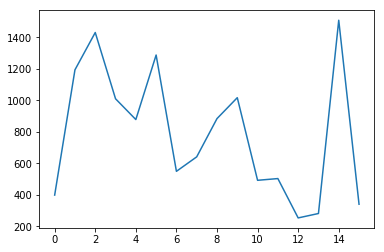

In [36]:
plt.plot(img_nums)
print(np.min(img_nums))

In [37]:
np.min(img_nums)

253

In [29]:
for root,dirs,files in os.walk(input_path):
        for i in dirs:
            folder_path = os.path.join(root,i)
            lens =  len(os.listdir(folder_path))
            if lens < 250:
                call(['rm',"-rf",folder_path])

## Data augmentation

In [ ]:
from keras.preprocessing import 